In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from deeplearning_from_scratch.functions import *
from deeplearning_from_scratch.gradient import *

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, z)

        return loss

class TwoLayerNet:

    def __init__(self, input_size, hidden_state_size, output_size, weight_init_std=0.01):
        self.params = {}
        
        self.params['W1'] = weight_init_std * \
                                np.random.randn(input_size, hidden_state_size)
        self.params['b1'] = np.zeros(hidden_state_size)
        self.params['W2'] = weight_init_std * \
                                np.random.randn(hidden_state_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        grads = {}
        batch_num = x.shape[0]

        #forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        #backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads



In [2]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [3]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(1, iters_num / batch_size)

net = TwoLayerNet(input_size=784, hidden_state_size=100, output_size=10)


In [4]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = net.numerical_gradient(x_batch, t_batch)
    grad = net.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= learning_rate * grad[key]

    loss = net.loss(x_batch, t_batch)
    
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = net.accuracy(x_batch, t_batch)
        test_acc = net.accuracy(x_test, t_test)

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("iter[{}]'s loss: {}".format(i, loss))
        print("iter[{}]'s train_acc: {}".format(i, train_acc))
        print("iter[{}]'s test_acc: {}".format(i, test_acc))




iter[0]'s loss: 2.2792395848088733
iter[0]'s train_acc: 0.15
iter[0]'s test_acc: 0.1009
iter[100]'s loss: 2.249280609882325
iter[100]'s train_acc: 0.22
iter[100]'s test_acc: 0.1276
iter[200]'s loss: 2.0103931369360715
iter[200]'s train_acc: 0.55
iter[200]'s test_acc: 0.5029
iter[300]'s loss: 1.4700907865862063
iter[300]'s train_acc: 0.65
iter[300]'s test_acc: 0.5954
iter[400]'s loss: 1.0392095633692873
iter[400]'s train_acc: 0.8
iter[400]'s test_acc: 0.7028
iter[500]'s loss: 0.8475220394596871
iter[500]'s train_acc: 0.86
iter[500]'s test_acc: 0.7937
iter[600]'s loss: 0.8394441690685396
iter[600]'s train_acc: 0.78
iter[600]'s test_acc: 0.8099
iter[700]'s loss: 0.539944333362423
iter[700]'s train_acc: 0.89
iter[700]'s test_acc: 0.8331
iter[800]'s loss: 0.5133860877431923
iter[800]'s train_acc: 0.89
iter[800]'s test_acc: 0.8547
iter[900]'s loss: 0.5330294847804141
iter[900]'s train_acc: 0.84
iter[900]'s test_acc: 0.8655
iter[1000]'s loss: 0.4514134113309123
iter[1000]'s train_acc: 0.89
it

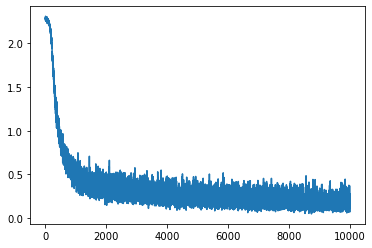

In [5]:
import matplotlib.pylab as plt

plt.plot(train_loss_list)


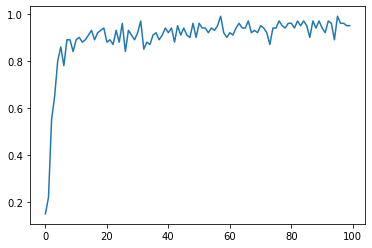

In [6]:
plt.plot(train_acc_list)

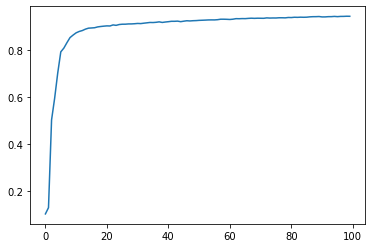

In [7]:
plt.plot(test_acc_list)